In [1]:
import pandas as pd

dataset_path = r'D:\downloads\archive\Dataset-SA.csv'
df = pd.read_csv(dataset_path)


print(df.head())


                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder


In [5]:
texts = df['Review'].values  
labels = df['Sentiment'].values  






In [6]:

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)



In [7]:

train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)



In [9]:

print(train_texts[:10])  
print(type(train_texts)) 
print(type(train_texts[0])) 


['wonderful' 'wonderful' 'slightly disappointed' 'mind-blowing purchase'
 'nice product' 'fabulous!' 'worth the money' 'useless product'
 'expected a better product' 'terrible product']
<class 'numpy.ndarray'>
<class 'str'>


In [10]:
import numpy as np

train_texts = np.array([str(text) if pd.notna(text) else '' for text in train_texts])

print(train_texts[:10])  

['wonderful' 'wonderful' 'slightly disappointed' 'mind-blowing purchase'
 'nice product' 'fabulous!' 'worth the money' 'useless product'
 'expected a better product' 'terrible product']


In [11]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts) 


In [15]:

train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)



In [16]:
max_length = 100


train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')


In [19]:
import tensorflow as tf

In [20]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=3)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=3)

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,051,843
Trainable params: 1,051,843
Non-trainable params: 0
_________________________________________________________________


In [23]:

history = model.fit(train_padded, train_labels, 
                    validation_data=(val_padded, val_labels),
                    epochs=10, 
                    batch_size=32)  


Epoch 1/10
5127/5127 [==============================] - 54s 10ms/step - loss: 0.3567 - accuracy: 0.8941 - val_loss: 0.3433 - val_accuracy: 0.8998
Epoch 2/10
5127/5127 [==============================] - 51s 10ms/step - loss: 0.3458 - accuracy: 0.8972 - val_loss: 0.3445 - val_accuracy: 0.8997
Epoch 3/10
5127/5127 [==============================] - 51s 10ms/step - loss: 0.3442 - accuracy: 0.8975 - val_loss: 0.3423 - val_accuracy: 0.8998
Epoch 4/10
5127/5127 [==============================] - 51s 10ms/step - loss: 0.3437 - accuracy: 0.8975 - val_loss: 0.3406 - val_accuracy: 0.8997
Epoch 5/10
5127/5127 [==============================] - 52s 10ms/step - loss: 0.3429 - accuracy: 0.8977 - val_loss: 0.3406 - val_accuracy: 0.8999
Epoch 6/10
5127/5127 [==============================] - 51s 10ms/step - loss: 0.3426 - accuracy: 0.8977 - val_loss: 0.3417 - val_accuracy: 0.8998
Epoch 7/10
5127/5127 [==============================] - 51s 10ms/step - loss: 0.3421 - accuracy: 0.8977 - val_loss: 0.3424 -

In [24]:

val_loss, val_accuracy = model.evaluate(val_padded, val_labels)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")


1282/1282 [==============================] - 6s 4ms/step - loss: 0.3424 - accuracy: 0.8995
Validation Accuracy: 89.95%


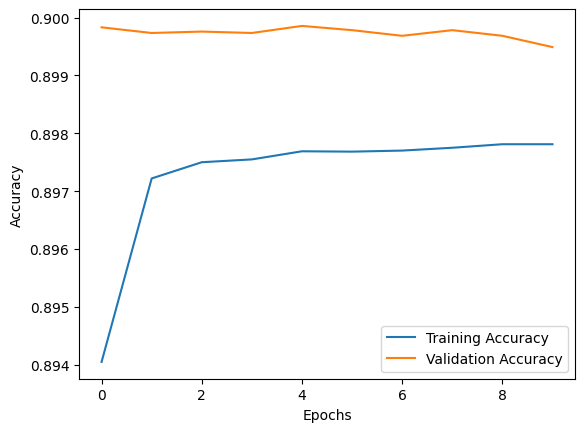

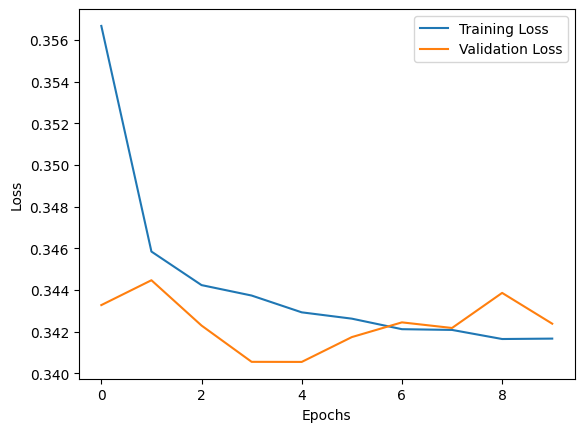

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [26]:

new_text = ["This product is fantastic!"]

new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post', truncating='post')


prediction = model.predict(new_padded)
predicted_label = label_encoder.inverse_transform([prediction.argmax(axis=-1)[0]])

print(f"Predicted Sentiment: {predicted_label[0]}")


1/1 [==============================] - 0s 141ms/step
Predicted Sentiment: positive
